# Data 

Récuperation de toutes les données 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
import datetime
from datetime import datetime
%matplotlib inline

In [ ]:
def date_substring(data):
    for i in range(len(data)):
        data['date'][i]=str(data['date'][i])[0:10]

##  Market Features : 
    
###  Donnee OCHLV

 https://www.cryptodatadownload.com/data/binance/econo

In [ ]:
dataOCHLV = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/Binance_BTCUSDT_d.csv',sep=';' )
###drop
dataOCHLV = dataOCHLV.drop('unix', 1)
dataOCHLV = dataOCHLV.drop('symbol', 1)
dataOCHLV = dataOCHLV.drop('Colonne1', 1)

### rename
dataOCHLV = dataOCHLV.rename(columns={'Volume BTC': 'volubtc','Volume USDT': 'voluusdt'})
'''### add info

dataOCHLV['HL_PCT'] = (dataOCHLV['high'] - dataOCHLV['low']) / dataOCHLV['low'] * 100.0
dataOCHLV['PCT_change'] = (dataOCHLV['close'] - dataOCHLV['open']) / dataOCHLV['open'] * 100.0'''

##date format
date_substring(dataOCHLV)
dataOCHLV['date'] = pd.to_datetime(dataOCHLV['date'],format="%d/%m/%Y")
dataOCHLV = dataOCHLV.set_index("date")

print(dataOCHLV.shape)
dataOCHLV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1580, 7)


,open,high,low,close,volubtc,voluusdt,tradecount
date,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86000,2.812379e+06,NaN
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86000,2.812379e+06,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
...,...,...,...,...,...,...,...
2021-12-07,50441.91,51936.33,50039.74,50588.95,38253.46877,1.950574e+09,1212350.0
2021-12-08,50588.95,51200.00,48600.00,50471.19,38425.92466,1.925459e+09,1118225.0
2021-12-09,50471.19,50797.76,47320.00,47545.59,37692.68665,1.841475e+09,1130599.0


##  Social Features : 
    


###   Sentiment analysis

In [ ]:
pip install vaderSentiment

In [ ]:
dataSenti = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/Bitcoin_tweets.csv',sep=',' )

In [ ]:
dataSenti


In [ ]:
dataSenti = dataSenti.drop('user_name', 1)
dataSenti = dataSenti.drop('user_location', 1)
dataSenti = dataSenti.drop('user_description', 1)
dataSenti = dataSenti.drop('user_created', 1)
dataSenti = dataSenti.drop('user_followers', 1)
dataSenti = dataSenti.drop('user_friends', 1)
dataSenti = dataSenti.drop('user_favourites', 1)
dataSenti = dataSenti.drop('user_verified', 1)
dataSenti = dataSenti.drop('is_retweet', 1)
dataSenti = dataSenti.drop('source', 1)
dataSenti = dataSenti.drop('hashtags', 1)


dataSenti.info()

In [ ]:
dataSenti[dataSenti["date"].str.contains("'ETH', 'BTC', 'Bitcoin'")==False]

In [ ]:

dataSenti['date'] = pd.to_datetime(dataSenti['date'], errors='coerce',format="%Y-%m-%d")
dataSenti = dataSenti.dropna(subset=['date'])



In [ ]:

dataSenti=dataSenti.assign(pos=0.1,neg=0.1,neu=0.1,compound=0.1,)
dataSenti

In [ ]:
dataSenti['text'][0]

In [ ]:
# function to print sentiments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# of the sentence.
def sentiment_scores(data):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    for i in range(len(data)):
        sentiment_dict = sid_obj.polarity_scores(data['text'][i])
        data['neg'][i] = sentiment_dict['neg']
        data['neu'][i] = sentiment_dict['neu']
        data['pos'] [i]= sentiment_dict['pos']
        data['compound'][i]= sentiment_dict['compound']










In [ ]:
dataSenti = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/datasentim_btc.csv',sep=',' )
dataSenti.to_csv("datasentim_btc.csv")
dataSenti

In [ ]:
dataSenti=dataSenti.dropna()
dataSenti.tail(50000)

In [ ]:

dataSenti1 = dataSenti.set_index("date")

In [ ]:
from datetime import date, timedelta

start_date = date(2021, 2, 10) 
end_date = date(2021, 12, 12)    # perhaps date.now()

delta = end_date - start_date   # returns timedelta


DataSentiDaily = pd.DataFrame(dataOCHLV, columns=[ 'pos', 'neg', 'neu', 'compound'])
DataSentiDaily = DataSentiDaily['2021-02-10':'2021-12-11']
DataSentiDaily
 

In [ ]:
#sentiment_scores(dataSenti)

In [ ]:
dataSenti1.tail(20000)

In [ ]:
mask =dataSenti1['2021-11-26'] 
mask

In [ ]:
sentiment_scores(mask)
mask

In [ ]:
    posa=mask['pos'].mean() 
    nega=mask['neg'].mean() 
    neu=mask['neu'].mean() 
    print('pos : ',posa ,'neg : ', nega ,'neu : ', neu )

In [ ]:
mask

In [ ]:
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)


In [ ]:
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    print(day)
    mask =dataSenti1[str(day)] 
    sentiment_scores(mask)
    DataSentiDaily.loc[str(day)]['pos']=mask['pos'].mean() 
    DataSentiDaily.loc[str(day)]['neg']=mask['neg'].mean() 
    DataSentiDaily.loc[str(day)]['neu']=mask['neu'].mean() 
    DataSentiDaily.loc[str(day)]['compound']=mask['compound'].mean() 

In [ ]:
DataSentiDaily.head(50)

### Google trend

In [ ]:
"""
%matplotlib inline
from pytrends.request import TrendReq
from datetime import timedelta, date
import pandas as pd
import matplotlib.pyplot as plt

# List of parameters
hl = 'en-US'
tz = 360  # Timezone Offset (in minutes), tz = 360 means US CST
kw_list = ['Bitcoin']  # keyword list, FIVE at maximum
geo = 'US' # Two letter country abbreviation, 'US' for United States, default 'world'

start_date = date(year=2015, month=1, day=1)
end_date = date(year=2021, month=11, day=10)
timeframe = str(start_date) + ' ' + str(end_date)  # '2015-01-01 2020-04-01'

# Connect to Google
pytrends = TrendReq(hl=hl, tz=tz)

# get data from 2015-01-01 to 2020-04-01
pytrends.build_payload(kw_list=kw_list, timeframe=timeframe, geo=geo)
df_monthly = pytrends.interest_over_time()

# create a csv file
import csv
import time
from dateutil.relativedelta import relativedelta

filename = 'BTC-GOOGLE.csv'
with open(filename, 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(['Date', 'Bitcoin']) # title
    
END_DATE = date(year=2021, month=11, day=10)
one_month = relativedelta(months=+1)

start_date = date(year=2015, month=1, day=1)
# fill gaps of each month and write into the csv file
while start_date <= END_DATE:
    end_date = start_date + one_month
    timeframe = str(start_date) + ' ' + str(end_date)
    
    # fetch daily data 
    pytrends.build_payload(kw_list=kw_list, timeframe=timeframe, geo=geo)
    df_daily = pytrends.interest_over_time()
    
    # try to find the equation between monthly data and daily data, ax + b = y
    
    # when there is no solution
    if df_daily.loc[str(start_date),'Bitcoin'] == df_daily.loc[str(end_date),'Bitcoin']:
        a = 0
        b = 0
    else:
        a = (df_monthly.loc[str(end_date),'Bitcoin'] - df_monthly.loc[str(start_date),'Bitcoin']) / (df_daily.loc[str(end_date),'Bitcoin'] - df_daily.loc[str(start_date),'Bitcoin'])
        b = df_monthly.loc[str(end_date),'Bitcoin'] - a * df_daily.loc[str(start_date),'Bitcoin']
    
    # convert the data to fill monthly gap
    df_daily['Bitcoin'] = df_daily['Bitcoin'].apply(lambda x: a*x+b if (a*x+b) > 0 else 0)
        
    # append the result to csv file
    df_daily[:-1].reset_index().to_csv(filename, mode='a', header=False, columns=['date', 'Bitcoin'], index=False)
    
    # set 1 sec waiting time, in case Google will deny my access.
    time.sleep(1)
    print(timeframe + ' finished.') 
    start_date = end_date

print('Cheers! Get the job done.') # the csv file is 'BTC-GOOGLE.csv'
"""

"\n%matplotlib inline\nfrom pytrends.request import TrendReq\nfrom datetime import timedelta, date\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# List of parameters\nhl = 'en-US'\ntz = 360  # Timezone Offset (in minutes), tz = 360 means US CST\nkw_list = ['Bitcoin']  # keyword list, FIVE at maximum\ngeo = 'US' # Two letter country abbreviation, 'US' for United States, default 'world'\n\nstart_date = date(year=2015, month=1, day=1)\nend_date = date(year=2021, month=11, day=10)\ntimeframe = str(start_date) + ' ' + str(end_date)  # '2015-01-01 2020-04-01'\n\n# Connect to Google\npytrends = TrendReq(hl=hl, tz=tz)\n\n# get data from 2015-01-01 to 2020-04-01\npytrends.build_payload(kw_list=kw_list, timeframe=timeframe, geo=geo)\ndf_monthly = pytrends.interest_over_time()\n\n# create a csv file\nimport csv\nimport time\nfrom dateutil.relativedelta import relativedelta\n\nfilename = 'BTC-GOOGLE.csv'\nwith open(filename, 'w') as csvfile:\n    filewriter = csv.writer(csvfile, delimit

In [ ]:
dataTrend = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/BTC-GOOGLE.csv',sep=',' )
###drop

### rename
dataTrend = dataTrend.rename(columns={'Date': 'date','Bitcoin': 'TrendGoogle'})

##date format
date_substring(dataTrend)
dataTrend['date'] = pd.to_datetime(dataTrend['date'],format="%Y/%m/%d")
dataTrend = dataTrend.set_index("date")


print(dataTrend.shape)
dataTrend


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2496, 1)


,TrendGoogle
date,
2015-01-01,3.0
2015-01-02,3.0
2015-01-03,3.0
2015-01-04,3.0
2015-01-05,3.0
...,...
2021-10-27,47.0
2021-10-28,38.0
2021-10-29,28.0


## Blockchain Features :

In [ ]:
dataBlockchain = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/blockchaindata.csv',sep=';' )



###drop

### rename
dataBlockchain = dataBlockchain.rename(columns={'Timestamp': 'date'})

##date format
date_substring(dataBlockchain)
dataBlockchain['date'] = pd.to_datetime(dataBlockchain['date'],format="%d/%m/%Y")
dataBlockchain = dataBlockchain.set_index("date")


dataMiner = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/miners-revenue.csv',sep=';' )
dataMiner

###drop

### rename
dataMiner = dataMiner.rename(columns={'Timestamp': 'date'})

##date format
date_substring(dataMiner)
dataMiner['date'] = pd.to_datetime(dataMiner['date'],format="%d/%m/%Y")
dataMiner = dataMiner.set_index("date")

dataBlockchain=pd.merge(dataBlockchain,dataMiner, how='inner', on='date')

print(dataBlockchain.shape)
dataBlockchain

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1571, 5)


,avg-block-size,n-transactions-per-block,transaction-fees,cost-per-transaction,miners-revenue
date,,,,,
2009-01-17,0.000216,NaN,NaN,NaN,NaN
2009-01-20,0.000225,1.008772,NaN,NaN,NaN
2009-01-23,0.000229,1.023810,NaN,NaN,NaN
2009-01-26,0.000240,1.010417,NaN,NaN,NaN
2009-01-29,0.000227,1.008264,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-28,0.967908,1537.899281,7.360521070000003,223.551525,4.778816e+07
2021-12-01,1.406416,2105.270073,20.561604789999997,174.487639,5.032607e+07
2021-12-04,1.091812,1636.606452,17.45400847999999,190.473364,4.831814e+07


## Economy Features :

In [ ]:
dataEco = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/microsoft.csv',sep=',' )
dataEco1 = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/fb.csv',sep=',' )
dataEco2 = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/tesla.csv',sep=',' )
dataEco3 = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/appledata.csv',sep=',' )

### rename
dataEco = dataEco.rename(columns={'Date': 'date','Open': 'open_microsoft'})
dataEco1 = dataEco1.rename(columns={'Date': 'date','Open': 'open_fb'})
dataEco2 = dataEco2.rename(columns={'Date': 'date','Open': 'open_tesla'})
dataEco3 = dataEco3.rename(columns={'Date': 'date','Open': 'open_apple'})
### drop
dataEco = dataEco.drop('Low', 1)
dataEco = dataEco.drop('Close/Last', 1)
dataEco = dataEco.drop('Volume', 1)
dataEco = dataEco.drop('High', 1)

dataEco1 = dataEco1.drop('Low', 1)
dataEco1 = dataEco1.drop('Close/Last', 1)
dataEco1 = dataEco1.drop('Volume', 1)
dataEco1 = dataEco1.drop('High', 1)

dataEco2 = dataEco2.drop('Low', 1)
dataEco2 = dataEco2.drop('Close/Last', 1)
dataEco2 = dataEco2.drop('Volume', 1)
dataEco2 = dataEco2.drop('High', 1)

dataEco3 = dataEco3.drop('Low', 1)
dataEco3 = dataEco3.drop('Close/Last', 1)
dataEco3 = dataEco3.drop('Volume', 1)
dataEco3 = dataEco3.drop('High', 1)

##date format


dataEco=pd.merge(dataEco,dataEco1, how='inner', on='date')
dataEco=pd.merge(dataEco,dataEco2, how='inner', on='date')
dataEco=pd.merge(dataEco,dataEco3, how='inner', on='date')

date_substring(dataEco)
dataEco['date'] = pd.to_datetime(dataEco['date'],format="%m/%d/%Y")
dataEco = dataEco.set_index("date")

for i in range(len(dataEco)):
        dataEco['open_microsoft'][i]=str(dataEco['open_microsoft'][i])[1:10]
        
for i in range(len(dataEco)):
        dataEco['open_fb'][i]=str(dataEco['open_fb'][i])[1:10]
        
for i in range(len(dataEco)):
        dataEco['open_tesla'][i]=str(dataEco['open_tesla'][i])[1:10]

for i in range(len(dataEco)):
        dataEco['open_apple'][i]=str(dataEco['open_apple'][i])[1:10]

        
dataEco['open_apple']=dataEco['open_apple'].astype(float)
dataEco['open_tesla']=dataEco['open_tesla'].astype(float)
dataEco['open_fb']=dataEco['open_fb'].astype(float)
dataEco['open_microsoft']=dataEco['open_microsoft'].astype(float)
print(dataEco.shape)
dataEco.info()

(1259, 4)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-12-10 to 2016-12-12
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_microsoft  1259 non-null   float64
 1   open_fb         1259 non-null   float64
 2   open_tesla      1259 non-null   float64
 3   open_apple      1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


## Indicateurs technique :

In [ ]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
nine_period_high = dataOCHLV['high'].rolling(window= 9).max()
nine_period_low = dataOCHLV['low'].rolling(window= 9).min()
dataOCHLV['tenkan_sen'] = (nine_period_high + nine_period_low) /2
# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = dataOCHLV['high'].rolling(window=26).max()
period26_low = dataOCHLV['low'].rolling(window=26).min()
dataOCHLV['kijun_sen'] = (period26_high + period26_low) / 2
# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
dataOCHLV['senkou_span_a'] = ((dataOCHLV['tenkan_sen'] + dataOCHLV['kijun_sen']) / 2).shift(26)
# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
period52_high = dataOCHLV['high'].rolling(window=52).max()
period52_low = dataOCHLV['low'].rolling(window=52).min()
dataOCHLV['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)
# The most current closing price plotted 26 time periods behind (optional)
dataOCHLV['chikou_span'] = dataOCHLV['close'].shift(-26)



##### macd  
dataOCHLV['e26'] = pd.Series.ewm(dataOCHLV['close'], span=26).mean()
dataOCHLV['e12'] = pd.Series.ewm(dataOCHLV['close'], span=12).mean()
dataOCHLV['MACD'] = dataOCHLV['e12'] - dataOCHLV['e26']
dataOCHLV = dataOCHLV.drop('e26', 1)
dataOCHLV = dataOCHLV.drop('e12', 1)   

dataOCHLV['MA_window_10'] = dataOCHLV['close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
dataOCHLV['MA_window_20'] = dataOCHLV['close'].rolling(20).mean().shift()

### Fear and greed index


dataFearGreed = pd.read_csv(r'/content/drive/MyDrive/Projet/daily/data/feargreed.csv',sep=',' )
dataFearGreed = dataFearGreed.rename(columns={'fng_value': 'date','date': 'fng_classification','fng_classification': 'fng_value'})
date_substring(dataFearGreed)
dataFearGreed['date'] = pd.to_datetime(dataFearGreed['date'],format="%d-%m-%Y")
dataFearGreed = dataFearGreed.set_index("date")

dataFearGreed = dataFearGreed.drop('fng_classification', 1)
dataFearGreed.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1409, 1)

## Variable with lag

In [ ]:
datalag = dataOCHLV['close']



datalag = pd.concat([datalag.shift(7)], axis=1)
datalag1 = datalag.rename(columns={'close': 'close_t-7'})
datalag = pd.concat([datalag1,dataOCHLV['close'].shift(3)], axis=1)
datalag = datalag.rename(columns={'close': 'close_t-3'})
datalag

## Variable supplementaire

In [ ]:
df= dataOCHLV
btc = { 'Day_dif': lambda dataOCHLV: (dataOCHLV['close']-dataOCHLV['open'])/dataOCHLV['open']}
df = df.assign(**btc)
df.head()

,open,high,low,close,volubtc,voluusdt,tradecount,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,MACD,MA_window_10,MA_window_20,Day_dif
date,,,,,,,,,,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN,NaN,NaN,NaN,NaN,4208.47,0.000000,NaN,NaN,-0.041354
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN,NaN,NaN,NaN,NaN,4163.72,0.000000,NaN,NaN,-0.041354
2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN,NaN,NaN,NaN,NaN,3944.69,-5.479767,NaN,NaN,-0.041238
2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN,NaN,NaN,NaN,NaN,3189.02,-6.696510,NaN,NaN,0.007694
2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN,NaN,NaN,NaN,NaN,3700.00,-9.353140,NaN,NaN,-0.012969


In [ ]:
for i in df: 
    datasup = { 'Close_off_high': lambda x: 2*(x['high']- x['close'])/(x['high']-x['low'])-1,
            'Volatility': lambda x: (x['high']- x['low'])/(x['open'])}
    df = df.assign(**datasup)

dataOCHLV = df
dataOCHLV

,open,high,low,close,volubtc,voluusdt,tradecount,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,MACD,MA_window_10,MA_window_20,Day_dif,Close_off_high,Volatility
date,,,,,,,,,,,,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86000,2.812379e+06,NaN,NaN,NaN,NaN,NaN,4208.47,0.000000,NaN,NaN,-0.041354,0.407413,0.063681
2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86000,2.812379e+06,NaN,NaN,NaN,NaN,NaN,4163.72,0.000000,NaN,NaN,-0.041354,0.407413,0.063681
2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN,NaN,NaN,NaN,NaN,3944.69,-5.479767,NaN,NaN,-0.041238,0.216176,0.100990
2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN,NaN,NaN,NaN,NaN,3189.02,-6.696510,NaN,NaN,0.007694,-0.732827,0.081465
2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN,NaN,NaN,NaN,NaN,3700.00,-9.353140,NaN,NaN,-0.012969,0.398521,0.043106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-07,50441.91,51936.33,50039.74,50588.95,38253.46877,1.950574e+09,1212350.0,50588.645,54201.060,63967.500,54300.000,NaN,-2542.084896,54297.890,56010.5395,0.002915,0.420845,0.037599
2021-12-08,50588.95,51200.00,48600.00,50471.19,38425.92466,1.925459e+09,1118225.0,50588.645,54201.060,63967.500,54782.695,NaN,-2594.788103,53884.682,55522.7435,-0.002328,-0.439377,0.051395
2021-12-09,50471.19,50797.76,47320.00,47545.59,37692.68665,1.841475e+09,1130599.0,50526.925,54201.060,63967.500,54837.500,NaN,-2839.890752,53204.313,55201.7220,-0.057966,0.870267,0.068906


# Visualisation

In [ ]:
data = dataOCHLV

In [ ]:
'''data=pd.merge(data,datalag, how='left', on='date')'''

"data=pd.merge(data,datalag, how='left', on='date')"

In [ ]:
data=pd.merge(data,dataBlockchain, how='left', on='date')


print(data.shape)
data.info()


(1580, 23)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2017-08-17 to 2021-12-11
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1580 non-null   float64
 1   high                      1580 non-null   float64
 2   low                       1580 non-null   float64
 3   close                     1580 non-null   float64
 4   volubtc                   1580 non-null   float64
 5   voluusdt                  1580 non-null   float64
 6   tradecount                1455 non-null   float64
 7   tenkan_sen                1572 non-null   float64
 8   kijun_sen                 1555 non-null   float64
 9   senkou_span_a             1529 non-null   float64
 10  senkou_span_b             1503 non-null   float64
 11  chikou_span               1554 non-null   float64
 12  MACD                      1580 non-null   float64
 13  MA_window_10              1570 non

In [ ]:
data=pd.merge(data,dataTrend, how='left', on='date')


print(data.shape)
data.info()



(1580, 24)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2017-08-17 to 2021-12-11
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1580 non-null   float64
 1   high                      1580 non-null   float64
 2   low                       1580 non-null   float64
 3   close                     1580 non-null   float64
 4   volubtc                   1580 non-null   float64
 5   voluusdt                  1580 non-null   float64
 6   tradecount                1455 non-null   float64
 7   tenkan_sen                1572 non-null   float64
 8   kijun_sen                 1555 non-null   float64
 9   senkou_span_a             1529 non-null   float64
 10  senkou_span_b             1503 non-null   float64
 11  chikou_span               1554 non-null   float64
 12  MACD                      1580 non-null   float64
 13  MA_window_10              1570 non

In [ ]:
data=pd.merge(data,dataEco, how='left', on='date')
print(data.shape)
data.info()

(1580, 28)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2017-08-17 to 2021-12-11
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1580 non-null   float64
 1   high                      1580 non-null   float64
 2   low                       1580 non-null   float64
 3   close                     1580 non-null   float64
 4   volubtc                   1580 non-null   float64
 5   voluusdt                  1580 non-null   float64
 6   tradecount                1455 non-null   float64
 7   tenkan_sen                1572 non-null   float64
 8   kijun_sen                 1555 non-null   float64
 9   senkou_span_a             1529 non-null   float64
 10  senkou_span_b             1503 non-null   float64
 11  chikou_span               1554 non-null   float64
 12  MACD                      1580 non-null   float64
 13  MA_window_10              1570 non

In [ ]:
data=pd.merge(data,dataFearGreed, how='left', on='date')
print(data.shape)
data.info()

(1580, 29)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2017-08-17 to 2021-12-11
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1580 non-null   float64
 1   high                      1580 non-null   float64
 2   low                       1580 non-null   float64
 3   close                     1580 non-null   float64
 4   volubtc                   1580 non-null   float64
 5   voluusdt                  1580 non-null   float64
 6   tradecount                1455 non-null   float64
 7   tenkan_sen                1572 non-null   float64
 8   kijun_sen                 1555 non-null   float64
 9   senkou_span_a             1529 non-null   float64
 10  senkou_span_b             1503 non-null   float64
 11  chikou_span               1554 non-null   float64
 12  MACD                      1580 non-null   float64
 13  MA_window_10              1570 non

In [ ]:


data['avg-block-size'] = data['avg-block-size'].fillna(method='backfill')
data['n-transactions-per-block'] = data['n-transactions-per-block'].fillna(method='backfill')
data['transaction-fees'] = data['transaction-fees'].fillna(method='backfill')
data['cost-per-transaction'] = data['cost-per-transaction'].fillna(method='backfill')
data['miners-revenue'] = data['miners-revenue'].fillna(method='backfill')

data['open_microsoft'] = data['n-transactions-per-block'].fillna(method='backfill')
data['open_tesla'] = data['transaction-fees'].fillna(method='backfill')
data['open_apple'] = data['cost-per-transaction'].fillna(method='backfill')
data['open_fb'] = data['miners-revenue'].fillna(method='backfill')


data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2017-08-17 to 2021-12-11
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1580 non-null   float64
 1   high                      1580 non-null   float64
 2   low                       1580 non-null   float64
 3   close                     1580 non-null   float64
 4   volubtc                   1580 non-null   float64
 5   voluusdt                  1580 non-null   float64
 6   tradecount                1455 non-null   float64
 7   tenkan_sen                1572 non-null   float64
 8   kijun_sen                 1555 non-null   float64
 9   senkou_span_a             1529 non-null   float64
 10  senkou_span_b             1503 non-null   float64
 11  chikou_span               1554 non-null   float64
 12  MACD                      1580 non-null   float64
 13  MA_window_10              1570 non-null   flo

In [ ]:
data1=data[202:1520]
data1['transaction-fees'] = data1.drop('transaction-fees', 1)
data1['transaction-fees'] = data1.drop('transaction-fees', 1)
data1= data1.fillna(method='backfill')
data1['open_tesla']=pd.to_numeric(data1['open_tesla'],errors = 'coerce')

data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1318 entries, 2018-03-05 to 2021-10-12
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      1318 non-null   float64
 1   high                      1318 non-null   float64
 2   low                       1318 non-null   float64
 3   close                     1318 non-null   float64
 4   volubtc                   1318 non-null   float64
 5   voluusdt                  1318 non-null   float64
 6   tradecount                1318 non-null   float64
 7   tenkan_sen                1318 non-null   float64
 8   kijun_sen                 1318 non-null   float64
 9   senkou_span_a             1318 non-null   float64
 10  senkou_span_b             1318 non-null   float64
 11  chikou_span               1318 non-null   float64
 12  MACD                      1318 non-null   float64
 13  MA_window_10              1318 non-null   flo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 9000x4320 with 0 Axes>

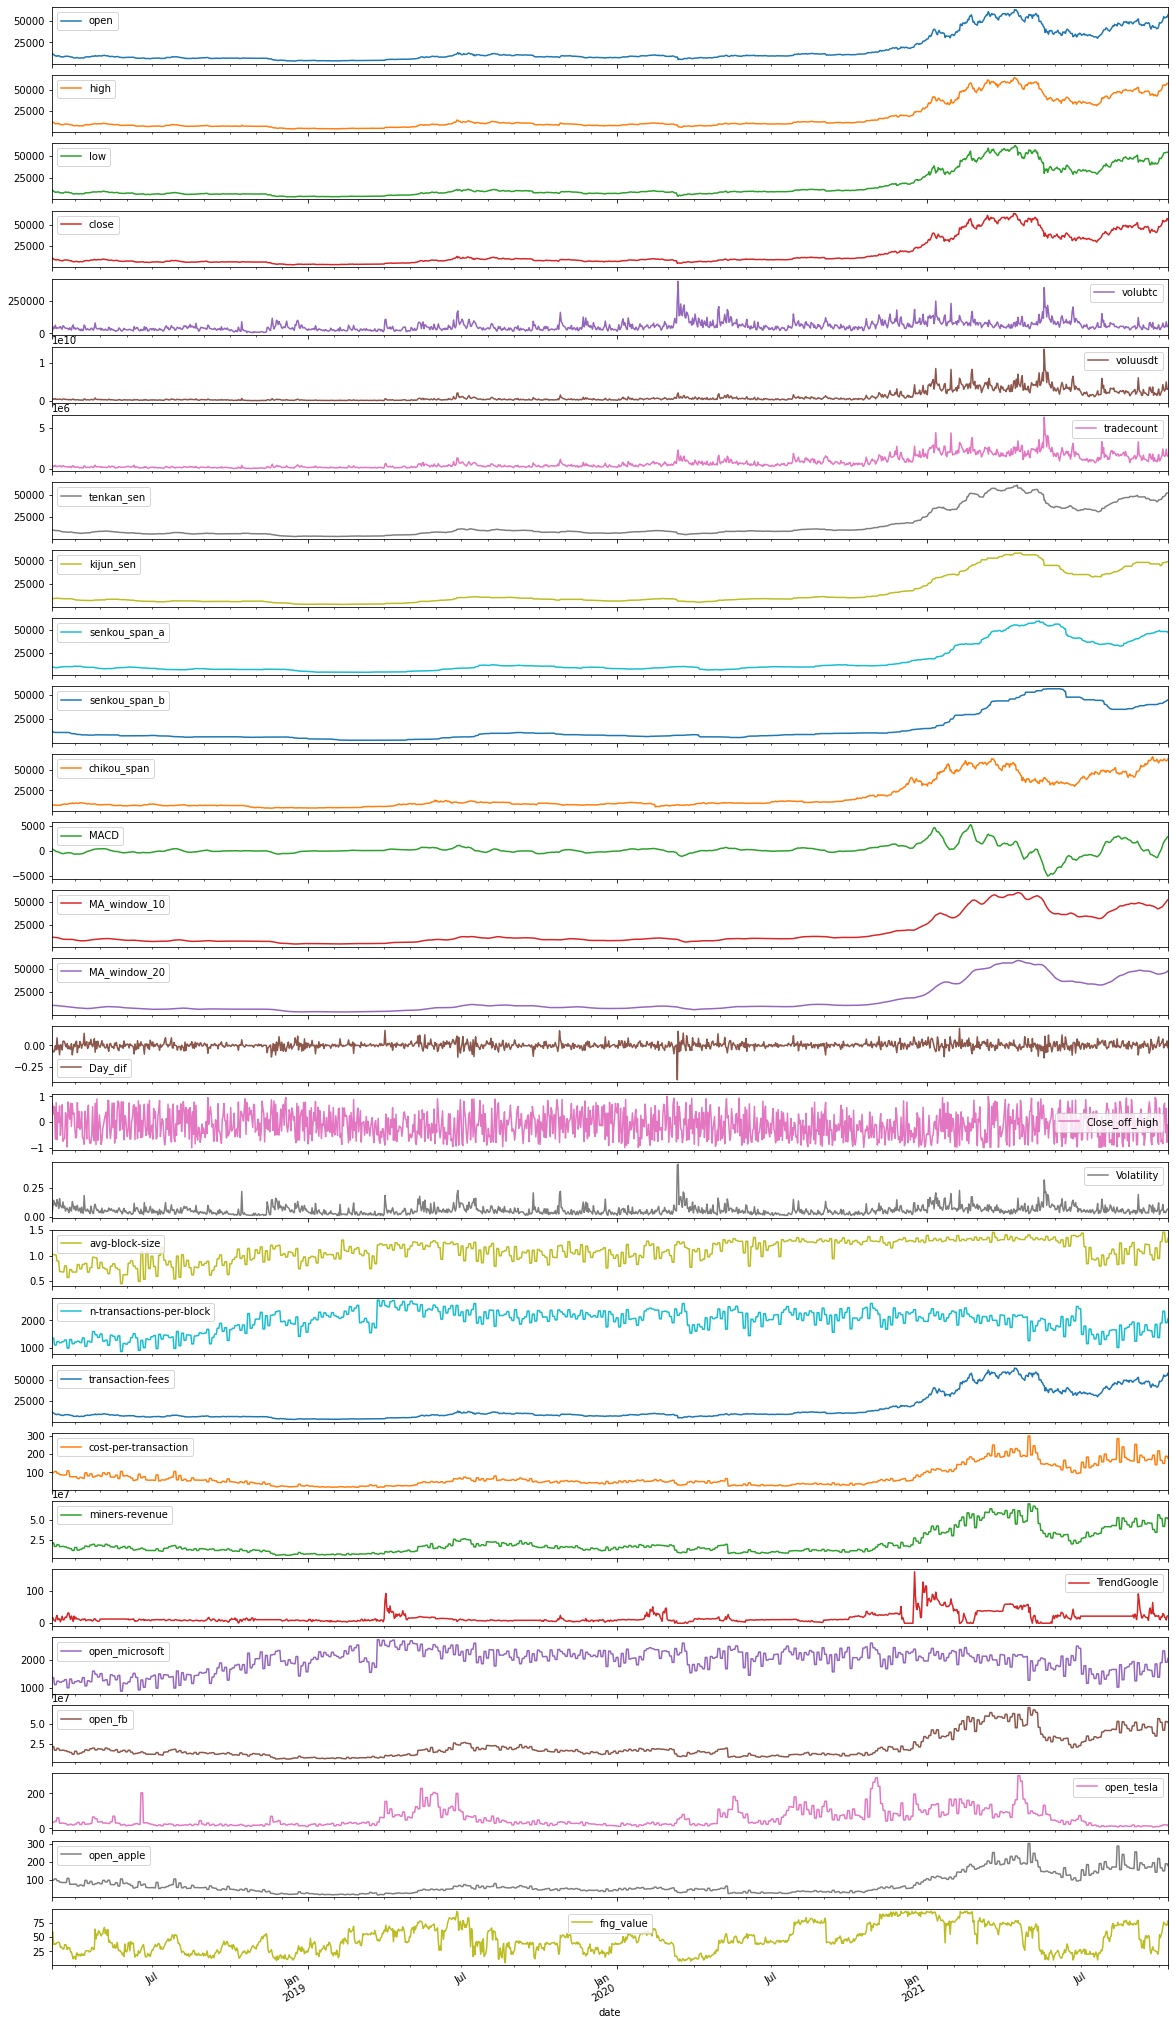

In [ ]:

plt.figure(figsize=(125, 60)) # resizing the plot
cols = data1.columns
axes = data1[cols].plot(figsize=(20, 40), subplots = True)

plt.show()


## Corrélation

In [ ]:
import matplotlib.pyplot as plt




sns.set_theme(style="white")




# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(98, 2, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-0.5, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .7},annot=True)

## Variance Inflation Factor (VIF) Explained 

In [ ]:
data1['transaction-fees'] = data1.drop('transaction-fees', 1)

In [ ]:
data1.columns

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
dataset = data1

dataset['open_tesla']=pd.to_numeric(dataset['open_tesla'],errors = 'coerce')
dataset['transaction-fees']=pd.to_numeric(dataset['transaction-fees'],errors = 'coerce')

#Market

dataset = dataset.drop('open', 1)
dataset = dataset.drop('high', 1)
dataset = dataset.drop('low', 1)
dataset = dataset.drop('voluusdt', 1)
dataset = dataset.drop('volubtc', 1)
dataset = dataset.drop('tradecount', 1)

#Social

#dataset = dataset.drop('TrendGoogle', 1)

#Blochain

dataset = dataset.drop('miners-revenue', 1)
dataset = dataset.drop('transaction-fees', 1)
dataset = dataset.drop('avg-block-size', 1)
dataset = dataset.drop('n-transactions-per-block', 1)
dataset = dataset.drop('cost-per-transaction', 1)

#Economy

dataset = dataset.drop('open_microsoft', 1)
dataset = dataset.drop('open_apple', 1)
#dataset = dataset.drop('open_tesla', 1)
dataset = dataset.drop('open_fb', 1)



#Indic

dataset = dataset.drop('senkou_span_b', 1)
dataset = dataset.drop('tenkan_sen', 1)
dataset = dataset.drop('kijun_sen', 1)
dataset = dataset.drop('senkou_span_a', 1)
dataset = dataset.drop('chikou_span', 1)

#dataset = dataset.drop('MACD', 1)
dataset = dataset.drop('MA_window_10', 1)
dataset = dataset.drop('MA_window_20', 1)

#dataset = dataset.drop('fng_value', 1)

#More

#dataset = dataset.drop('Day_dif', 1)
#dataset = dataset.drop('Close_off_high', 1)
#dataset = dataset.drop('Volatility', 1)
dataset = dataset.drop('close_t-3', 1)
dataset = dataset.drop('close_t-7', 1)


In [ ]:
calc_vif(dataset)




*  VIF starts at 1 and has no upper limit
*  VIF = 1, no correlation between the independent variable and the other variables
*  VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others






## Export csv

In [ ]:

dataset.to_csv("dataset_btc.csv")
dataset.info()

# Time Series


In [ ]:
# Add columns with year, month, and weekday name
data1['year'] = data1.index.year
data1['month'] = data1.index.month
data1['day'] = data1.index.day


## Stationary

In [ ]:
from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(data1['close'].values)

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")



## seasonal

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(data1['close'])

sd.plot()

## autocorrélation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1['close'], lags=40, alpha=0.05)


In [ ]:
plot_acf(data1['close'].diff().dropna(), lags=40, alpha=0.05)